#### Helper Functions

In [1]:
# Plot colors
lblue="#a6cee3"
blue = "#1f78b4"
lgreen = "#b2df8a"
green = "#33a02c"
black= "#424242"


from os import path, remove
import csv
import subprocess
from pandas import read_csv
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def get_results(tsvname):
    times=[]
    with open("experiments_results/"+tsvname+".results", newline='') as csvfile:
        csvreader = csv.reader(csvfile, delimiter='\t')
        for row in csvreader:
            if len(row)>0:
                splitrow = row[0].split()
                lastval = splitrow[len(splitrow) - 1]
                if (lastval[0].isdigit()):
                    times.append(float(lastval))
    print(len(times))
    print(times)
    return times


def fullConfiguration():
    return True


#### Figure 2

12
[797.90441, 202.669937, 238.770294, 322.989246, 105.69317, 53.196656, 76.546824, 106.426156, 807.530551, 279.720066, 79.597043, 44.451001]


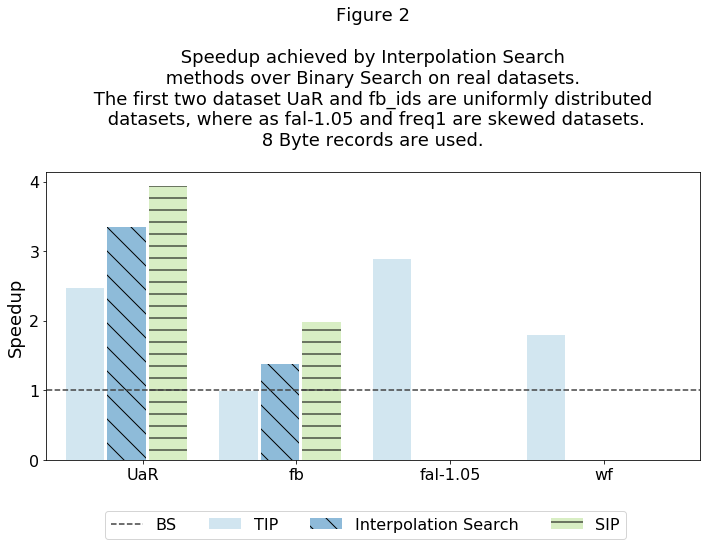

In [2]:
tsv = "fig2.tsv"

results=get_results(tsv)

uarResults=results[0:4]
fbidsResults=results[4:8]
falResults=results[8:10]
freq1Results=results[10:12]

# Calculate speedups of sip, is and tip compard to Binary Search
uarSpeedups = []
for i in range(1,len(uarResults)):
    uarSpeedups.append(uarResults[0]/uarResults[i])

fbidsSpeedups = []
for i in range(1,len(fbidsResults)):
    fbidsSpeedups.append(fbidsResults[0]/fbidsResults[i])

falSpeedups = []
for i in range(1,len(falResults)):
    falSpeedups.append(falResults[0]/falResults[i])

freq1Speedups = []
for i in range(1,len(freq1Results)):
    freq1Speedups.append(freq1Results[0]/freq1Results[i])


# Plot
# Group the speedups by algorithm
sipSpeedups=[uarSpeedups[0], fbidsSpeedups[0],0,0]
ISSpeedups=[uarSpeedups[1], fbidsSpeedups[1],0,0]
tipSpeedups=[uarSpeedups[2], fbidsSpeedups[2],falSpeedups[0], freq1Speedups[0]]

labels=["UaR", "fb", "fal-1.05", "wf"]
pos = [0,1,2,3]
width = 0.25 

caption = "Figure 2\n\n Speedup achieved by Interpolation Search \n methods over Binary Search on real datasets. \n The first two dataset UaR and fb_ids are uniformly distributed \n datasets, where as fal-1.05 and freq1 are skewed datasets.\n 8 Byte records are used. \n"

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(pos, 
        tipSpeedups, 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="TIP") 

plt.bar([p + width+.02 for p in pos], 
        ISSpeedups,
        width, 
        alpha=0.5, 
        color=blue, 
        label="Interpolation Search",
        hatch="\\") 

plt.bar([p + width*2+.04 for p in pos], 
        sipSpeedups,
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="SIP",
        hatch="-") 

plt.plot([-1,5],[1,1],linestyle="dashed", color=black, label="BS")

ax.set_ylabel('Speedup', size=18)

ax.set_title(caption, size=18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set the labels for the x ticks
ax.set_xticklabels(labels, size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
# plt.legend(prop={'size': 22}, ncol=3, loc='upper right', bbox_to_anchor=(0.7, -0.15))
plt.legend(['BS','TIP', 'Interpolation Search', 'SIP'], ncol=4, bbox_to_anchor=(.9, -0.15), loc='upper right',prop={'size': 16})
plt.tight_layout()
plt.gcf().savefig('./figures/fig2.pdf', format='pdf')

#### Figure 5

12
[52.989596, 105.583103, 106.336882, 76.442739, 68.452973, 153.991845, 126.866147, 102.816233, 131.117922, 231.344507, 212.355864, 189.692128]


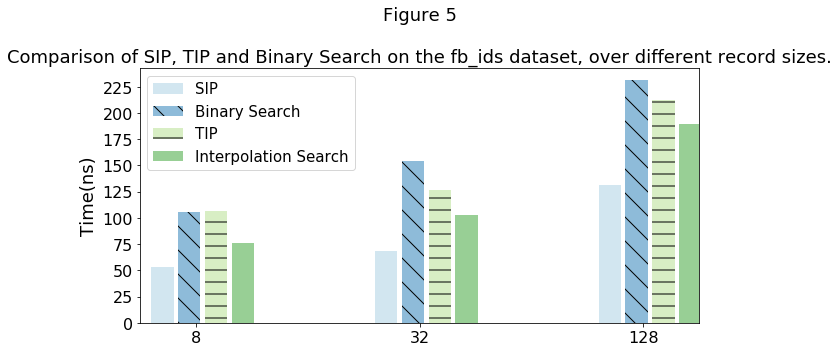

In [3]:
tsv="fig5.tsv"

results=get_results(tsv)

# Group the results by algorithm
sipResult=[results[0], results[4], results[8]]
bsResult=[results[1], results[5], results[9]]
tipResult=[results[2], results[6], results[10]]
isResult=[results[3], results[7], results[11]]

pos = [0,1,2]
width = 0.10 

fig, ax = plt.subplots(figsize=(11,5))
plt.bar(pos, 
        sipResult, 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="SIP") 

plt.bar([p + (width+.02)*1 for p in pos], 
        bsResult,
        width, 
        alpha=0.5, 
        color=blue, 
        label="Binary Search",
        hatch="\\") 

plt.bar([p + (width+.02)*2 for p in pos], 
        tipResult,
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="TIP",
        hatch="-")

plt.bar([p + (width+.02)*3 for p in pos], 
        isResult,
        width, 
        alpha=0.5, 
        color=green, 
        label="Interpolation Search") 

ax.set_ylabel('Time(ns)', size=18)

ax.set_title('Figure 5', size=22)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set the labels for the x ticks
ax.set_xticklabels(["8","32","128"], size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
caption = "Figure 5\n\nComparison of SIP, TIP and Binary Search on the fb_ids dataset, over different record sizes."
plt.title(caption, size=18)
plt.tight_layout()
plt.legend(['SIP', 'Binary Search', 'TIP', 'Interpolation Search' ], loc='upper right')
plt.legend(prop={'size': 15})


plt.gcf().savefig('./figures/fig5.pdf', format='pdf')

#### Figure 6

In [11]:
tsv="fig6.tsv"

results=get_results(tsv)

datasetSizes=[3,4,5,6,7]
if len(results) > 30:
    datasetSizes=[3,4,5,6,7,8,9]

# Group the results by algorithm
bsResults=results[0:(len(results)//2)]
sipResults=results[(len(results)//2):len(results)]
if len(results) > 30:
    sipResults.append(0)

# Calculate speedup
sipSpeedup=[(bsResults[i]/sipResults[i]) for i in range(len(bsResults))]

# Plot
# Group the speedups by RecordSize
groupedByRecordSize = [[],[],[]]
for i in range(len(datasetSizes)):
    groupedByRecordSize[0].append(sipSpeedup[3*i])
    groupedByRecordSize[1].append(sipSpeedup[3*i+1])
    groupedByRecordSize[2].append(sipSpeedup[3*i+2])

pos = [i for i in range(len(datasetSizes))]
width = 0.1

fig, ax = plt.subplots(figsize=(8,5))


plt.bar(pos, 
        groupedByRecordSize[0], 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="8") 

plt.bar([p + (width+.02)*1 for p in pos], 
        groupedByRecordSize[1],
        width, 
        alpha=0.5, 
        color=blue, 
        label="32",
        hatch="\\") 

plt.bar([p + (width+.02)*2 for p in pos], 
        groupedByRecordSize[2],
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="128",
        hatch="-")

plt.plot([-1,len(datasetSizes)],[1,1],linestyle="dashed", color=black, label="BS")

ax.set_ylabel('Speedup', size=18)

ax.set_title('Figure 6', size=22)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Set the labels for the x ticks
xticks=["10^"+str(i) for i in datasetSizes]
ax.set_xticklabels(xticks, size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, ncol=4, loc='upper right', bbox_to_anchor=(0.85, -0.15))
caption = "Figure 6\n\nSpeedup of SIP compared to Binary Search\nfor different dataset and record sizes, on the UaR dataset.\n 10^9 records of size 128B exceed the memory capacity."
plt.title(caption, size=18)
plt.tight_layout()
plt.gcf().savefig('./figures/fig6.pdf', format='pdf')

0
[]


IndexError: list index out of range

#### Figure 7

14
[15.926278, 59.186264, 115.648364, 276.467414, 689.825103, 1270.833736, 2182.164164, 7.046962, 36.344759, 53.722554, 120.557016, 205.256206, 291.071432, 427.867639]


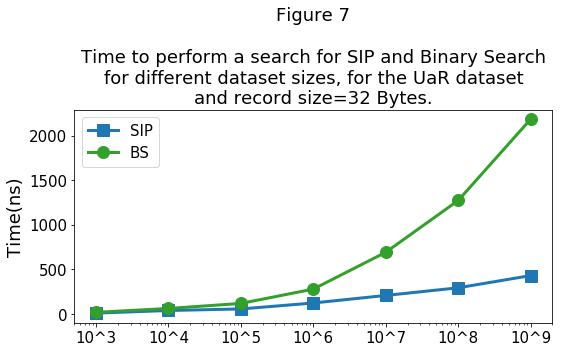

In [10]:
tsv="fig7.tsv"

results=get_results(tsv)

datasetSizes=[3,4,5,6,7]
if len(results) > 10:
    datasetSizes=[3,4,5,6,7,8,9]

# Group the results by algorithm
bsResults=results[0:(len(results)//2)]
sipResults=results[(len(results)//2):len(results)]

fig, ax = plt.subplots(figsize=(8,5))
plt.plot([10**i for i in datasetSizes], sipResults, color=blue,marker="s", markersize=12, linewidth=3, label="SIP")
plt.plot([10**i for i in datasetSizes], bsResults, color=green,marker="o", markersize=12, linewidth=3, label="BS")

ax.set_ylabel('Time(ns)', size=18)
ax.set_title('Figure 7', size=22)
ax.set_xscale('log')

# Set the position of the x ticks
ax.set_xticks([10**i for i in datasetSizes] )
ax.set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
ax.tick_params(axis="y", labelsize=15)

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, loc='upper left')
caption = "Figure 7\n\nTime to perform a search for SIP and Binary Search\nfor different dataset sizes, for the UaR dataset\nand record size=32 Bytes."
plt.title(caption, size=18)
plt.tight_layout()
plt.gcf().savefig('./figures/fig7.pdf', format='pdf')

#### Figure 8

32
[3.867434, 36.877121, 50.796239, 144.415058, 2.950556, 30.748085, 41.159482, 97.075603, 2.772243, 21.836905, 27.607463, 72.593385, 100.130259, 6.773426, 19.085052, 42.167086, 3.708144, 32.098807, 48.812357, 118.26313, 3.360304, 25.881478, 33.594302, 73.57328, 3.282225, 11.483139, 18.079115, 53.970456, 103.300065, 7.974738, 15.184106, 37.32951]
32
[4.556999, 44.639943, 105.202453, 183.967897, 3.361394, 37.745036, 80.423538, 134.313913, 3.231641, 26.731043, 60.300582, 98.390401, 102.494657, 7.997777, 37.974086, 60.167634, 4.290828, 39.026053, 89.193577, 187.823914, 3.717196, 30.01788, 60.057196, 101.64317, 3.647707, 12.858491, 39.206037, 68.290242, 105.730563, 10.075071, 31.05808, 47.522696]
32
[5.619029, 56.534295, 220.3126, 256.967585, 4.091763, 46.536719, 155.704384, 206.107816, 4.045205, 34.767126, 112.690402, 136.779647, 329.177612, 20.057892, 93.976425, 149.195784, 5.200058, 49.217535, 195.642956, 292.753445, 4.572949, 38.119818, 107.427546, 155.073243, 4.579279, 15.547207, 61.1

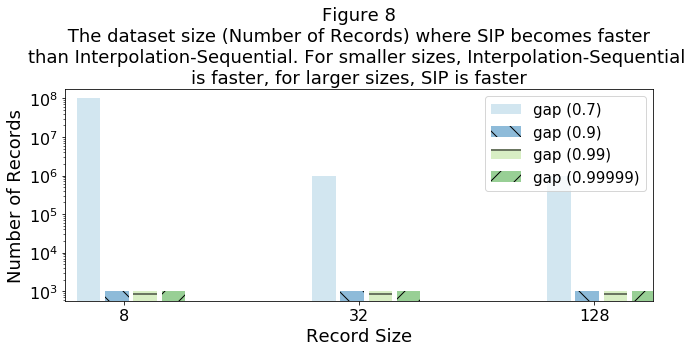

In [6]:
tsv8="fig8_8.tsv"
tsv32="fig8_32.tsv"
tsv128="fig8_128.tsv"

datasetSizes=[3,5,6,7]

results8=get_results(tsv8)
results32=get_results(tsv32)
results128=get_results(tsv128)

shape1=[len(datasetSizes)+1 for i in range(0,3)]
shape2=[len(datasetSizes)+1 for i in range(0,3)]
shape3=[len(datasetSizes)+1 for i in range(0,3)]
shape4=[len(datasetSizes)+1 for i in range(0,3)]

def analyzeResults(results, shape1, shape2, shape3, shape4, rc):
    sipResults=results[0:(len(results)//2)]
    isseqResults=results[(len(results)//2):len(results8)]

    sipResultsShape1=sipResults[0:len(datasetSizes)]
    sipResultsShape2=sipResults[len(datasetSizes):2*len(datasetSizes)]
    sipResultsShape3=sipResults[2*len(datasetSizes):3*len(datasetSizes)]
    sipResultsShape4=sipResults[3*len(datasetSizes):4*len(datasetSizes)]

    isseqResultsShape1=isseqResults[0:len(datasetSizes)]
    isseqResultsShape2=isseqResults[len(datasetSizes):2*len(datasetSizes)]
    isseqResultsShape3=isseqResults[2*len(datasetSizes):3*len(datasetSizes)]
    isseqResultsShape4=isseqResults[3*len(datasetSizes):4*len(datasetSizes)]

    for i in range(0,len(datasetSizes)):
        if sipResultsShape1[i] < isseqResultsShape1[i]:
            shape1[rc]=(i)
            break
    for i in range(0,len(datasetSizes)):
        if sipResultsShape2[i] < isseqResultsShape2[i]:
            shape2[rc]=(i)
            break
    for i in range(0,len(datasetSizes)):
        if sipResultsShape3[i] < isseqResultsShape3[i]:
            shape3[rc]=(i)
            break
    for i in range(0,len(datasetSizes)):
        if sipResultsShape4[i] < isseqResultsShape4[i]:
            shape4[rc]=(i)
            break

analyzeResults(results8, shape1, shape2, shape3, shape4,0)
analyzeResults(results32, shape1, shape2, shape3, shape4,1)
analyzeResults(results128, shape1, shape2, shape3, shape4,2)

shape1=[10**(3+i) for i in shape1]
shape2=[10**(3+i) for i in shape2]
shape3=[10**(3+i) for i in shape3]
shape4=[10**(3+i) for i in shape4]

pos = [0,1,2]
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(pos, 
        shape1, 
        width, 
        alpha=0.5, 
        color=lblue, 
        label="gap (0.7)") 

plt.bar([p + width+.02 for p in pos], 
        shape2,
        width, 
        alpha=0.5, 
        color=blue, 
        label="gap (0.9)",
        hatch="\\") 

plt.bar([p + width*2+.04 for p in pos], 
        shape3,
        width, 
        alpha=0.5, 
        color=lgreen, 
        label="gap (0.99)",
        hatch="-") 

plt.bar([p + width*3+.06 for p in pos], 
        shape4,
        width, 
        alpha=0.5, 
        color=green, 
        label="gap (0.99999)",
        hatch="/") 


ax.set_ylabel('Number of Records', size=18)
ax.set_xlabel('Record Size', size=18)
ax.set_yscale('log')
caption = "Figure 8\n The dataset size (Number of Records) where SIP becomes faster \nthan Interpolation-Sequential. For smaller sizes, Interpolation-Sequential \nis faster, for larger sizes, SIP is faster"
ax.set_title(caption, size=18)

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])
labels=["8","32","128"]
# Set the labels for the x ticks
ax.set_xticklabels(labels, size=15)
ax.tick_params(axis='both', which='major', labelsize=16)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
# plt.ylim([0, max(df['pre_score'] + df['mid_score'] + df['post_score'])] )

# Adding the legend and showing the plot
plt.legend(['gap (0.7)', 'gap (0.9)', 'gap (0.99)', 'gap (0.99999)'], loc='upper right')
plt.legend(prop={'size': 15})
plt.tight_layout()
plt.gcf().savefig('./figures/fig8.pdf', format='pdf')

#### Figure 9

112
[12.961739, 12.537966, 12.710443, 12.129504, 44.160683, 44.114773, 43.68909, 44.116178, 83.243496, 83.12791, 83.210399, 82.908194, 158.545354, 157.858114, 157.649498, 157.745728, 384.796747, 385.220447, 384.806055, 384.750563, 818.285228, 859.720158, 859.01595, 854.207742, 1556.36518, 1430.473057, 1388.085852, 1386.001984, 18.54029, 19.134092, 18.151897, 19.467343, 50.78225, 23.692556, 37.080114, 42.906957, 68.242106, 45.077917, 55.002611, 65.149482, 114.10544, 61.97748, 78.934752, 102.392891, 380.042495, 167.477892, 232.611679, 259.894698, 398.335622, 292.44476, 324.115373, 374.417075, 669.692402, 372.323138, 413.706163, 504.431041, 12.820855, 12.207461, 12.163447, 12.621742, 44.309371, 44.184051, 45.060023, 45.103044, 82.22933, 82.291806, 82.450416, 82.324806, 152.024148, 153.119188, 153.15121, 153.393254, 390.46175, 390.139974, 389.776491, 390.032925, 821.930325, 783.843209, 783.276441, 785.41385, 1471.095041, 1425.637052, 1423.939126, 1415.807478, 25.63203, 23.416414, 21.980707

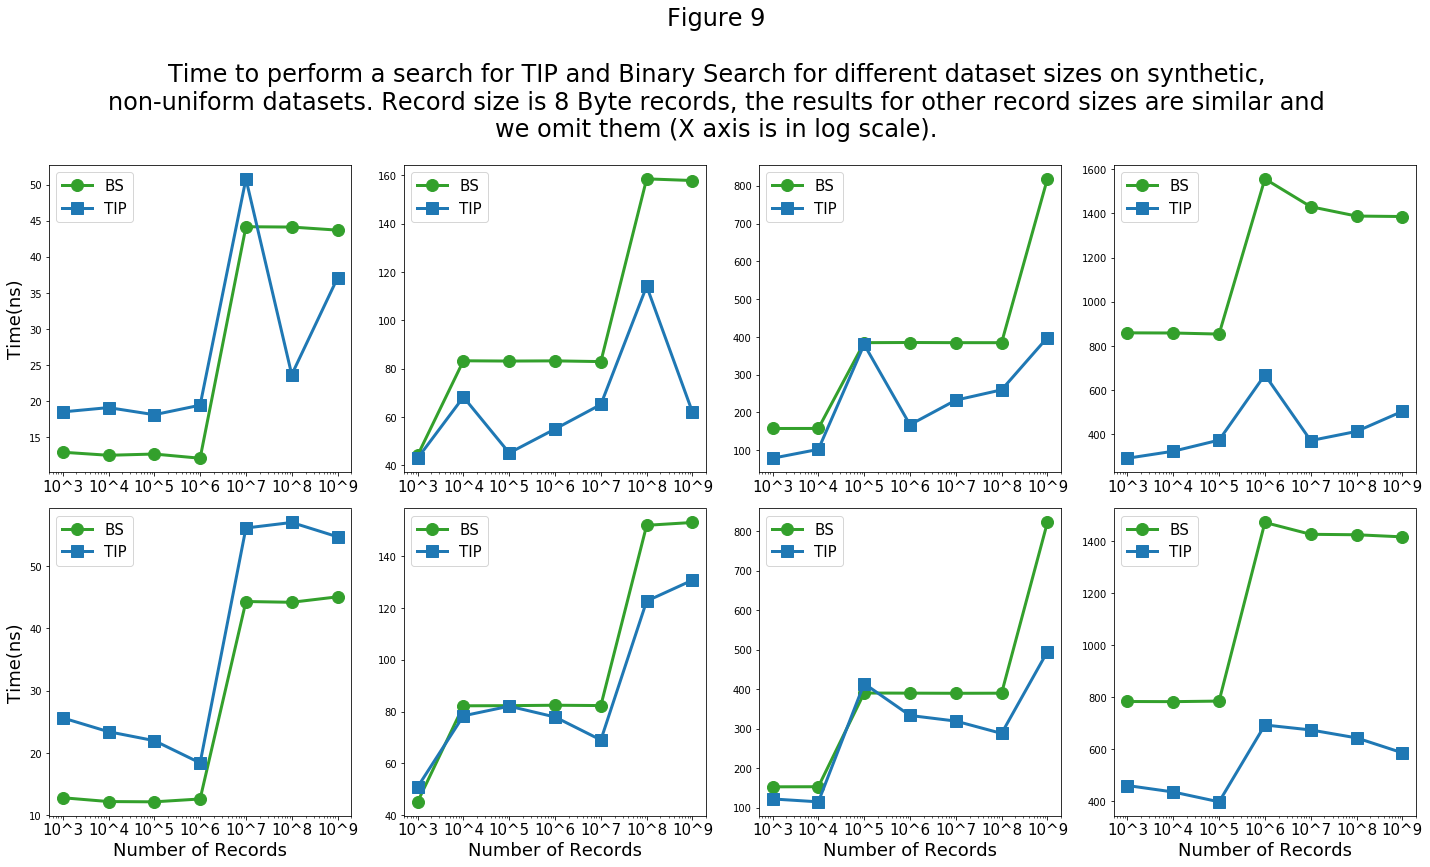

In [7]:
tsvfal="fig9_fal.tsv"
tsvcfal="fig9_cfal.tsv"

results_fal=get_results(tsvfal)
results_cfal=get_results(tsvcfal)

results = []
results.extend(tsvfal)
results.extend(tsvcfal)

datasetSizes=[3,4,5,6,7]#,8,9]
if len(results) > 80:
    datasetSizes=[3,4,5,6,7,8,9]

shapes = [0.5,1.05,1.25,1.5]

# Group Results by algorithm
falResults=results[0:(len(results)//2)]
cfalResults=results[(len(results)//2):len(results)]

bsResults=falResults[0:(len(falResults)//2)]
bsResults.extend(cfalResults[0:(len(cfalResults)//2)])

tipResults=falResults[(len(falResults)//2):len(falResults)]
tipResults.extend(cfalResults[(len(cfalResults)//2):len(cfalResults)])


# Group results by plot
perPlot=[]
for i in range(0,8):
    perPlot.append([[],[]])
    for j in range(0, len(datasetSizes)):
        perPlot[i][0].append(bsResults[len(datasetSizes)*i+j])
        perPlot[i][1].append(tipResults[len(datasetSizes)*i+j])


# Plot Helpers        
xticks=["10^"+str(i) for i in datasetSizes]
datasetSizesPlot=[]
for i in datasetSizes:
    datasetSizesPlot.append(10**i)


figs, axs = plt.subplots(2,4,figsize=(20,10))
for i in range(0, len(shapes)):
    axs[0,i].plot(datasetSizesPlot, perPlot[i][0],  color=green,marker="o", markersize=12, linewidth=3, label="BS")
    axs[0,i].plot(datasetSizesPlot, perPlot[i][1],  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")
    axs[0,i].set_xscale('log')
    axs[0,i].set_xticks([10**i for i in datasetSizes] )
    axs[0,i].set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
    axs[0,i].legend(prop={'size': 15}, loc='upper left')

for i in range(0, len(shapes)):
    axs[1,i].plot(datasetSizesPlot, perPlot[len(shapes)+i][0],  color=green,marker="o", markersize=12, linewidth=3, label="BS")
    axs[1,i].plot(datasetSizesPlot, perPlot[len(shapes)+i][1],  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")
    axs[1,i].set_xlabel('Number of Records', size=18)
    axs[1,i].set_xscale('log')
    axs[1,i].set_xticks([10**i for i in datasetSizes] )
    axs[1,i].set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
    axs[1,i].legend(prop={'size': 15}, loc='upper left')

axs[0,0].set_ylabel('Time(ns)', size=18)
axs[1,0].set_ylabel('Time(ns)', size=18)

caption = "Figure 9\n\nTime to perform a search for TIP and Binary Search for different dataset sizes on synthetic,\nnon-uniform datasets. Record size is 8 Byte records, the results for other record sizes are similar and\nwe omit them (X axis is in log scale)."

figs.suptitle(caption, fontsize=24, x=0.5, y=1.2)
plt.tight_layout()
plt.gcf().savefig('./figures/fig9.pdf', format='pdf', bbox_inches='tight')

#### Figure 10

8
[6.614003, 53.130565, 73.398819, 129.608083, 5.869711, 53.1262, 76.603555, 148.342918]


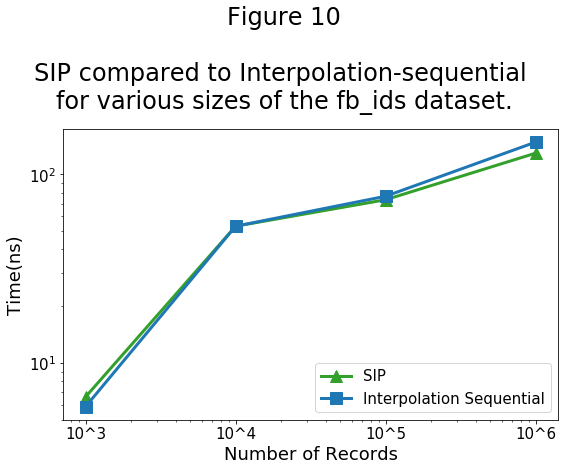

In [8]:
tsv="fig10.tsv"

datasetSizes = [3,4,5,6]

results=get_results(tsv)

# Group by algorithm
sipResults = results[0:(len(results)//2)]
isseqResults = results[(len(results)//2):len(results)]


fig, ax = plt.subplots(figsize=(8,5))

plt.plot([10**i for i in datasetSizes], sipResults, color=green,marker="^", markersize=12, linewidth=3, label="SIP")
plt.plot([10**i for i in datasetSizes], isseqResults, color=blue,marker="s", markersize=12, linewidth=3, label="Interpolation Sequential")

ax.set_ylabel('Time(ns)', size=18)
ax.set_xlabel('Number of Records', size=18)
ax.set_xscale('log')
ax.set_yscale('log')

# Set the position of the x ticks
ax.set_xticks([10**i for i in datasetSizes] )
ax.set_xticklabels(["10^"+str(i) for i in datasetSizes], size=15)
ax.tick_params(axis='y', labelsize=15)

# Adding the legend and showing the plot
plt.legend(prop={'size': 15}, loc='lower right')
caption = "Figure 10\n\nSIP compared to Interpolation-sequential \nfor various sizes of the fb_ids dataset."
fig.suptitle(caption, fontsize=24, x=0.5, y=1.3)
plt.tight_layout()
plt.gcf().savefig('./figures/fig10.pdf', format='pdf',bbox_inches='tight')

#### Figure 11

12
[44.183248, 47.536595, 50.610007, 79.682855, 106.100219, 134.102731, 77.928087, 89.389749, 104.103972, 83.012807, 111.898572, 158.92537]


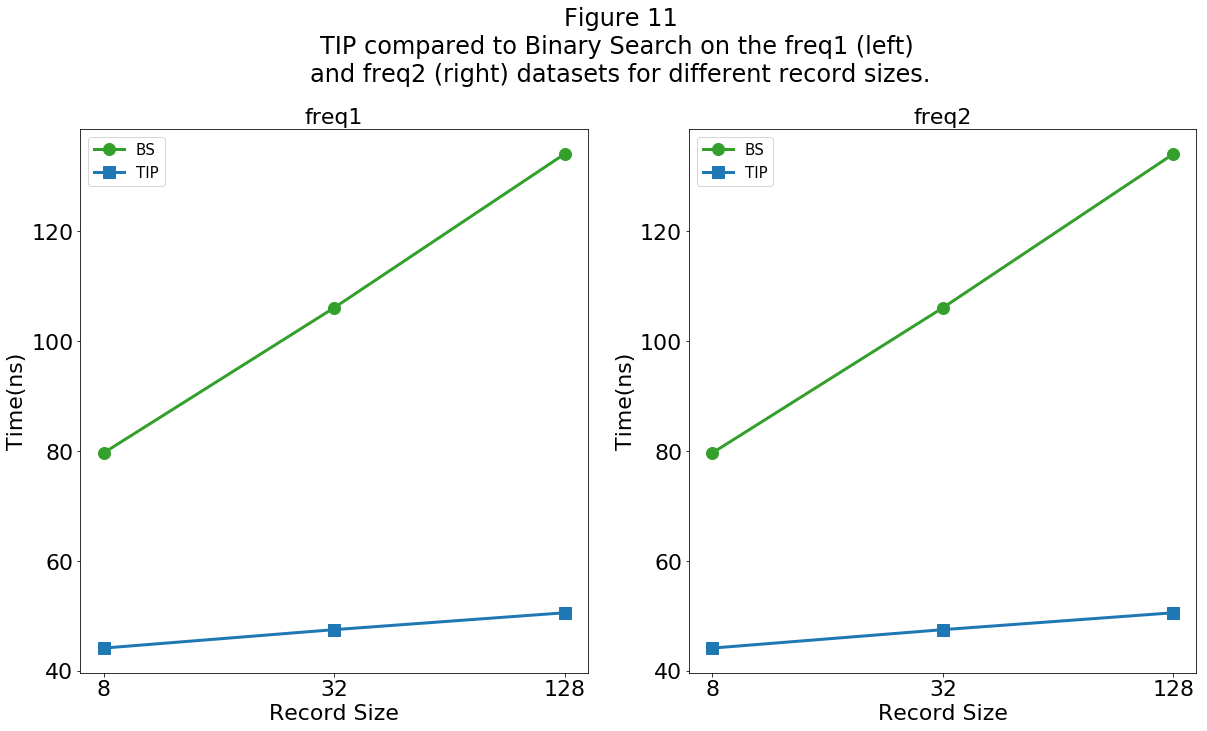

In [9]:
tsv="fig11.tsv"

results=get_results(tsv)

freq1Res = results[0:(len(results)//2)]
freq2Res = results[(len(results)//2):len(results)]

freq1ResultsTIP = freq1Res[0:(len(freq1Res)//2)]
freq1ResultsBS = freq1Res[(len(freq1Res)//2):len(freq1Res)]
freq2ResultsTIP = freq2Res[0:(len(freq2Res)//2)]
freq2ResultsBS = freq2Res[(len(freq2Res)//2):len(freq2Res)]

figs, axs = plt.subplots(1,2,figsize=(20,10))
axs[0].plot([0,1,2], freq1ResultsBS,  color=green,marker="o", markersize=12, linewidth=3, label="BS")
axs[0].plot([0,1,2], freq1ResultsTIP,  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")

axs[1].plot([0,1,2], freq1ResultsBS,  color=green,marker="o", markersize=12, linewidth=3, label="BS")
axs[1].plot([0,1,2], freq1ResultsTIP,  color=blue,marker="s", markersize=12, linewidth=3, label="TIP")

for i in range(0,2):
    axs[i].set_xticks([0,1,2])
    axs[i].set_xticklabels(["8","32","128"], size=22)
    axs[i].legend(prop={'size': 15}, loc='upper left') 
    axs[i].set_ylabel('Time(ns)', size=22)
    axs[i].set_xlabel('Record Size', size=22)
    axs[i].tick_params(axis='y', labelsize=22)

axs[0].set_title('freq1', size=22)
axs[1].set_title('freq2', size=22)

caption="Figure 11\nTIP compared to Binary Search on the freq1 (left) \nand freq2 (right) datasets for different record sizes."
figs.suptitle(caption, fontsize=24, x=0.5, y=1.05)

plt.gcf().savefig('./figures/fig11.pdf', format='pdf', bbox_inches='tight')